# Simple linear regression model for housing_prices_SLR dataset and predict house price based on the area of the house using the library scikit_learn.

- Analyze the R^2 score of predicted training and test models
score.
- Display the all the data points along with fitmodel

**Functions used:**

train_test_split()

LinearRegression()

model_name.fit()

model_name.intercept_

model_name.coef_

model_name.predict()

r2_score()


In [ ]:
# Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

># Getting familiar with the data

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/AIML_datasets/housing_prices.csv")
df.head()

,AREA,FLOOR,ROOM,CODE,PRICE
0,1000,7,2,B,5618
1,1030,7,1,A,5201
2,1060,1,1,A,4779
3,1090,6,1,A,5425
4,1120,0,2,B,5657


> # Feature matrix and Target Vector

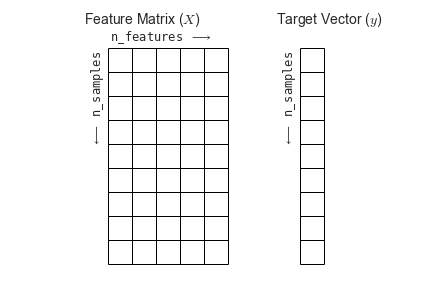

In [ ]:
# Feature matrix and Target vector
x = df[['AREA']].values  # Feature matrix (2D array)
y = df['PRICE'].values      # Target vector (1D array)
x[:5], y[:5]  # Display first 5 values

(array([[1000],
        [1030],
        [1060],
        [1090],
        [1120]]),
 array([5618, 5201, 4779, 5425, 5657]))

> # **train_test_split()**

**Description:** Splits a dataset into training and testing subsets. This is essential for evaluating machine learning models.

**Arguments:**
X, y: Features and target variables.

- **test_size:** Proportion of the dataset to include in the test split (e.g., test_size=0.2 for 20%).

- **random_state:** Ensures reproducibility by controlling the shuffling of data.

- **shuffle:** Whether to shuffle the data before splitting (default: True).

In [ ]:
# Split the data into 80-20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Check the shape of training and test sets
print(x_train.shape)
print(x_test.shape)

(40, 1)
(10, 1)


> # **LinearRegression()**

**Description:** Initializes a linear regression model object to perform linear regression. The model predicts a target variable as a linear combination of input features.

**Arguments:** No mandatory arguments. Optional arguments include fit_intercept (default: True) and normalize (default: False in modern versions).

> # **model_name.fit()**

**Description:** Fits the linear regression model to the training data, learning the intercept and coefficients.

**Arguments:**
X_train: Training features.
y_train: Target variable corresponding to the training features.

> # **model_name.intercept_**

**Description:** Retrieves the intercept (bias term) of the fitted linear regression model. This is the predicted value of y when all features are zero.

**Arguments:** None (attribute, not a method).

> # **model_name.coef_**

**Description:** Retrieves the coefficients (weights) of the features in the fitted linear regression model. These represent the contribution of each feature to the prediction.

**Arguments:** None (attribute, not a method).

In [ ]:
# Fit the line - Train the SLR Model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Print intercept and coefficient
print("Intercept (b0):", lr_model.intercept_)
print("Coefficient (b1):", lr_model.coef_)

Intercept (b0): -3103.34066448488
Coefficient (b1): [7.75979089]


In [ ]:
# Fit the model without intercept
lr_model_no_intercept = LinearRegression(fit_intercept=False)
lr_model_no_intercept.fit(x_train, y_train)

# Print intercept and coefficient for no intercept
print("Intercept (b0):", lr_model_no_intercept.intercept_)
print("Coefficient (b1):", lr_model_no_intercept.coef_)


Intercept (b0): 0.0
Coefficient (b1): [6.03609138]


> # **model_name.predict()**

**Description:** Predicts the target variable (y) for a given set of input features using the learned linear regression model.

**Arguments:**
X: Feature set (can be test data or new data).

> # **r2_score()**

**Description:** Computes the R-squared (coefficient of determination) score to evaluate the goodness of fit of a regression model. It indicates the proportion of the variance in the dependent variable explained by the independent variables.

**Arguments:**

- y_true: Actual target values.

- y_pred: Predicted target values by the model.

In [ ]:
# Predict using the model
y_train_pred = lr_model.predict(x_train)
y_test_pred = lr_model.predict(x_test)

# Calculate R² score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² Train Score: {r2_train}")
print(f"R² Test Score: {r2_test}")


R² Train Score: 0.865632112064227
R² Test Score: 0.570954870212099


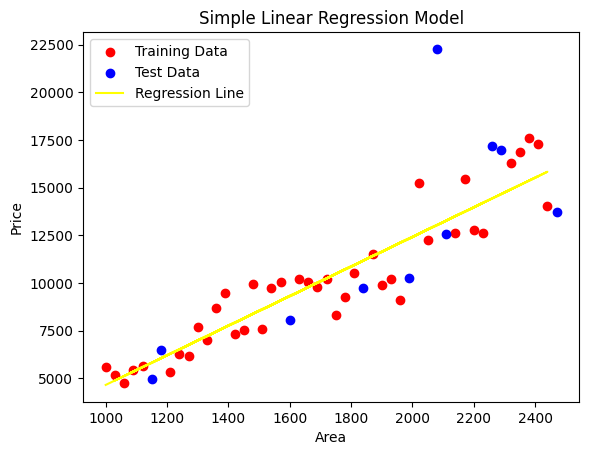

In [ ]:
# Visualizing the model
plt.scatter(x_train[:, 0], y_train, c='red', label='Training Data')
plt.scatter(x_test[:, 0], y_test, c='blue', label='Test Data')
plt.plot(x_train[:, 0], lr_model.predict(x_train), c='yellow', label='Regression Line')
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.title("Simple Linear Regression Model")
plt.show()
